In [1]:
from tensorflow.keras import layers,datasets,models
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

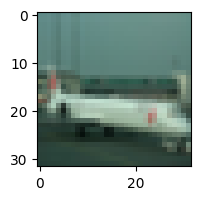

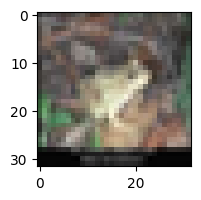

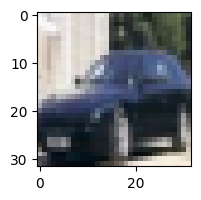

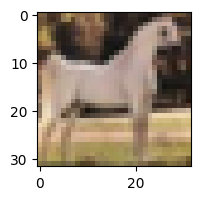

In [4]:
for i in range(4):
    rand = np.random.randint(1,50000)
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[rand])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
model = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=3,input_shape=(32,32,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=3,input_shape=(32,32,3),activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train,y_train,epochs = 10)

d:\Compilers\Python 3.10.11\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3853 - loss: 1.6893
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5852 - loss: 1.1759
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6440 - loss: 1.0146
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6826 - loss: 0.9202
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7078 - loss: 0.8401
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7282 - loss: 0.7809
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7476 - loss: 0.7273
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7635 - loss: 0.6763
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7778 - loss: 0.6418
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7903 - loss: 0.6064


In [7]:
model.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6922 - loss: 0.9320


[0.9441292881965637, 0.6861000061035156]

In [8]:
prediction = model.predict(X_test)
prediction_labels = [np.argmax(i) for i in prediction]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [9]:
from tensorflow import math
conf = math.confusion_matrix(y_test,predictions=prediction_labels)

<Axes: >

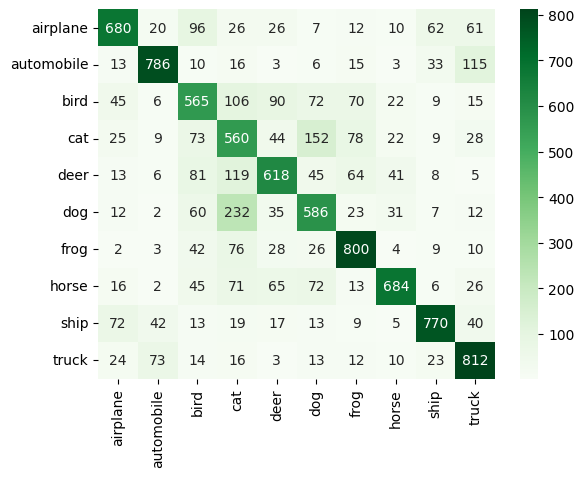

In [10]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
sns.heatmap(conf,cmap='Greens',fmt='d',annot=True,xticklabels=labels,yticklabels=labels)


In [ ]:
import joblib as jb
jb.dump(model,'animal.pkl')